
# Telecom Churn - Case Study


## Business Problem Overview

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business goal.


To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

## Business Objective

 The dataset contains customer-level information for a span of four consecutive months - June, July, August and September. The months are encoded as 6, 7, 8 and 9, respectively. 


The usiness objective is to predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months. To do this task well, understanding the typical customer behaviour during churn will be helpful.


### Importing the Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### Reading the CSV file

In [2]:
df = pd.read_csv('telecom_churn_data.csv')
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


### Understanding the data

In [3]:
# Information on dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [4]:
# Description of numerical variables of dataframe

df.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,...,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,7.001207e+09,109.0,0.0,0.0,0.0,282.987358,278.536648,279.154731,261.645069,132.395875,...,0.084581,0.914404,0.908764,0.890808,0.860968,1219.854749,68.170248,66.839062,60.021204,3.299373
std,6.956694e+05,0.0,0.0,0.0,0.0,328.439770,338.156291,344.474791,341.998630,297.207406,...,0.650457,0.279772,0.287950,0.311885,0.345987,954.733842,267.580450,271.201856,253.938223,32.408353
min,7.000000e+09,109.0,0.0,0.0,0.0,-2258.709000,-2014.045000,-945.808000,-1899.505000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000606e+09,109.0,0.0,0.0,0.0,93.411500,86.980500,84.126000,62.685000,7.380000,...,0.000000,1.000000,1.000000,1.000000,1.000000,467.000000,0.000000,0.000000,0.000000,0.000000
50%,7.001205e+09,109.0,0.0,0.0,0.0,197.704000,191.640000,192.080000,176.849000,34.310000,...,0.000000,1.000000,1.000000,1.000000,1.000000,863.000000,0.000000,0.000000,0.000000,0.000000
75%,7.001812e+09,109.0,0.0,0.0,0.0,371.060000,365.344500,369.370500,353.466500,118.740000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1807.500000,0.000000,0.000000,0.000000,0.000000
max,7.002411e+09,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,38805.617000,7376.710000,...,49.000000,1.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.210000,2618.570000


In [5]:
# Description of categorical variables of dataframe

df.describe(include=object)

,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9
count,99999,99398,98899,98340,98392,98232,96377,95239,25153,25571,26339,25922
unique,1,1,1,1,30,31,31,30,30,31,31,30
top,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/30/2014,7/31/2014,8/31/2014,9/29/2014,6/30/2014,7/31/2014,8/31/2014,9/29/2014
freq,99999,99398,98899,98340,16960,17288,14706,22623,1888,1813,1998,2329



## Data Preparation

In [6]:
# Columns having more than and equal to 70 percent of Null values 

df.columns[round(100*df.isnull().sum()/len(df),2)>=70]

Index(['date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8', 'date_of_last_rech_data_9',
       'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8',
       'total_rech_data_9', 'max_rech_data_6', 'max_rech_data_7',
       'max_rech_data_8', 'max_rech_data_9', 'count_rech_2g_6',
       'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9',
       'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8',
       'count_rech_3g_9', 'av_rech_amt_data_6', 'av_rech_amt_data_7',
       'av_rech_amt_data_8', 'av_rech_amt_data_9', 'arpu_3g_6', 'arpu_3g_7',
       'arpu_3g_8', 'arpu_3g_9', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8',
       'arpu_2g_9', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8',
       'night_pck_user_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9'],
      dtype='object')

In [7]:
# Dropping columns having more than and equal 70 percentage null values

df.drop(['fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9', 'date_of_last_rech_data_6', 'date_of_last_rech_data_7',
         'date_of_last_rech_data_8', 'date_of_last_rech_data_9', 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8',
         'max_rech_data_9', 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9', 'count_rech_3g_6',
         'count_rech_3g_7', 'count_rech_3g_8', 'count_rech_3g_9', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_3g_9',
         'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'arpu_2g_9', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8',
         'night_pck_user_9'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 194 entries, mobile_number to sep_vbc_3g
dtypes: float64(151), int64(35), object(8)
memory usage: 148.0+ MB


In [8]:
# Filling missing values with 0

df['total_rech_data_6'].fillna(0, inplace=True)
df['total_rech_data_7'].fillna(0, inplace=True)
df['total_rech_data_8'].fillna(0, inplace=True)
df['total_rech_data_9'].fillna(0, inplace=True)
df['av_rech_amt_data_6'].fillna(0, inplace=True)
df['av_rech_amt_data_7'].fillna(0, inplace=True)
df['av_rech_amt_data_8'].fillna(0, inplace=True)
df['av_rech_amt_data_9'].fillna(0, inplace=True)

In [9]:
# Checking for columns with less than 70 percent null values

df_lt_70 = df.columns[round(100*df.isnull().sum()/len(df),2)<70]
df_lt_70

Index(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou',
       'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7',
       'last_date_of_month_8', 'last_date_of_month_9', 'arpu_6',
       ...
       'monthly_3g_9', 'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8',
       'sachet_3g_9', 'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g',
       'sep_vbc_3g'],
      dtype='object', length=194)

In [10]:
# Description of numerical variables of dataframe with columns less null values

df[df_lt_70].describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,...,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,7.001207e+09,109.0,0.0,0.0,0.0,282.987358,278.536648,279.154731,261.645069,132.395875,...,0.086341,0.074781,0.080401,0.084501,0.084581,1219.854749,68.170248,66.839062,60.021204,3.299373
std,6.956694e+05,0.0,0.0,0.0,0.0,328.439770,338.156291,344.474791,341.998630,297.207406,...,0.384978,0.568344,0.628334,0.660234,0.650457,954.733842,267.580450,271.201856,253.938223,32.408353
min,7.000000e+09,109.0,0.0,0.0,0.0,-2258.709000,-2014.045000,-945.808000,-1899.505000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000606e+09,109.0,0.0,0.0,0.0,93.411500,86.980500,84.126000,62.685000,7.380000,...,0.000000,0.000000,0.000000,0.000000,0.000000,467.000000,0.000000,0.000000,0.000000,0.000000
50%,7.001205e+09,109.0,0.0,0.0,0.0,197.704000,191.640000,192.080000,176.849000,34.310000,...,0.000000,0.000000,0.000000,0.000000,0.000000,863.000000,0.000000,0.000000,0.000000,0.000000
75%,7.001812e+09,109.0,0.0,0.0,0.0,371.060000,365.344500,369.370500,353.466500,118.740000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1807.500000,0.000000,0.000000,0.000000,0.000000
max,7.002411e+09,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,38805.617000,7376.710000,...,11.000000,29.000000,35.000000,41.000000,49.000000,4337.000000,12916.220000,9165.600000,11166.210000,2618.570000


In [11]:
# Description of categorical variables of dataframe with column less null values

df[df_lt_70].describe(include='object')

,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9
count,99999,99398,98899,98340,98392,98232,96377,95239
unique,1,1,1,1,30,31,31,30
top,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/30/2014,7/31/2014,8/31/2014,9/29/2014
freq,99999,99398,98899,98340,16960,17288,14706,22623


### Imputation

In [12]:
# Dataframe containing filtered data after removal of columns having >70 % of null values

df=df[df_lt_70]

In [13]:
df.shape

(99999, 194)

In [14]:
#columns which are numeric 

colsnumeric = df.select_dtypes([np.int64,np.float64]).columns

In [15]:
df[colsnumeric].head(10)

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,197.385,214.816,213.803,21.100,NaN,...,0,0,0,0,0,968,30.40,0.00,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,34.047,355.074,268.321,86.285,24.11,...,0,0,0,0,0,1006,0.00,0.00,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,167.690,189.058,210.226,290.714,11.54,...,0,0,0,0,0,1103,0.00,0.00,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,221.338,251.102,508.054,389.500,99.91,...,0,0,0,0,0,2491,0.00,0.00,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,261.636,309.876,238.174,163.426,50.31,...,0,0,0,0,0,1526,0.00,0.00,0.00,0.00
5,7000286308,109,0.0,0.0,0.0,50.258,58.810,83.386,170.826,50.16,...,0,0,0,0,0,1471,0.00,0.00,0.00,0.00
6,7001051193,109,0.0,0.0,0.0,429.023,190.704,255.114,114.751,71.03,...,0,0,0,0,0,1673,0.00,0.00,0.00,0.00
7,7000701601,109,0.0,0.0,0.0,1069.180,1349.850,3171.480,500.000,57.84,...,0,0,0,0,0,802,57.74,19.38,18.74,0.00
8,7001524846,109,0.0,0.0,0.0,378.721,492.223,137.362,166.787,413.69,...,0,0,0,0,0,315,21.03,910.65,122.16,0.00
9,7001864400,109,0.0,0.0,0.0,119.518,247.435,170.231,160.042,33.89,...,0,0,0,0,0,902,0.00,0.00,0.00,0.00


In [16]:
#columns which are objects which are categorical

colsobject = df.select_dtypes([np.object]).columns

In [17]:
df[colsobject].head()

,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9
0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/21/2014,7/16/2014,8/8/2014,9/28/2014
1,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/29/2014,7/31/2014,8/28/2014,9/30/2014
2,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/17/2014,7/24/2014,8/14/2014,9/29/2014
3,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/28/2014,7/31/2014,8/31/2014,9/30/2014
4,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/26/2014,7/28/2014,8/9/2014,9/28/2014


In [18]:
### Use Simple Imputer with max_frequency for imputation for categorical variables

from sklearn.impute import SimpleImputer

imp_mode = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

df[colsobject] = imp_mode.fit_transform(df[colsobject])

In [19]:
### Use Simple Imputer with median for imputation for continuous variables

imp_median = SimpleImputer(missing_values=np.nan, strategy='median')

df[colsnumeric] = imp_median.fit_transform(df[colsnumeric])

In [20]:
df.shape

(99999, 194)

### Derived Columns

- tot_data_rech = tot_rech * av_data_rech
- tot_rech = tot_data_rech + tot_rech_amt

In [21]:
# Creating columns to know the total data recharge in month of 6 and 7

df['tot_data_rech_6'] = df['total_rech_data_6'] * df['av_rech_amt_data_6']
df['tot_data_rech_7'] = df['total_rech_data_7'] * df['av_rech_amt_data_7']
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,tot_data_rech_6,tot_data_rech_7
0,7.000843e+09,109.0,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0.0,0.0,0.0,968.0,30.4,0.0,101.20,3.58,252.0,252.0
1,7.001866e+09,109.0,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0.0,0.0,0.0,1006.0,0.0,0.0,0.00,0.00,0.0,154.0
2,7.001626e+09,109.0,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0.0,0.0,0.0,1103.0,0.0,0.0,4.17,0.00,0.0,0.0
3,7.001204e+09,109.0,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0.0,0.0,0.0,2491.0,0.0,0.0,0.00,0.00,0.0,0.0
4,7.000142e+09,109.0,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0.0,0.0,0.0,1526.0,0.0,0.0,0.00,0.00,56.0,0.0


In [22]:
# Creating column for average recharge for month 6 and 7 month

df['tot_rech_6'] = df['tot_data_rech_6'] + df['total_rech_amt_6']
df['tot_rech_7'] = df['tot_data_rech_7'] + df['total_rech_amt_7']
df['avg_rech_6-7'] = round((df['tot_rech_6'] + df['tot_rech_7'])/2, 2)
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,tot_data_rech_6,tot_data_rech_7,tot_rech_6,tot_rech_7,avg_rech_6-7
0,7.000843e+09,109.0,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,968.0,30.4,0.0,101.20,3.58,252.0,252.0,614.0,504.0,559.0
1,7.001866e+09,109.0,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,1006.0,0.0,0.0,0.00,0.00,0.0,154.0,74.0,538.0,306.0
2,7.001626e+09,109.0,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,1103.0,0.0,0.0,4.17,0.00,0.0,0.0,168.0,315.0,241.5
3,7.001204e+09,109.0,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,2491.0,0.0,0.0,0.00,0.00,0.0,0.0,230.0,310.0,270.0
4,7.000142e+09,109.0,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,1526.0,0.0,0.0,0.00,0.00,56.0,0.0,252.0,350.0,301.0


### Deriving high value customers 

In [23]:
# Obtaining the customers who have average recharge more than equal to 70th percentile

high_value_cust = df[df['avg_rech_6-7'] >= np.quantile(df['avg_rech_6-7'], 0.7)]
high_value_cust.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,tot_data_rech_6,tot_data_rech_7,tot_rech_6,tot_rech_7,avg_rech_6-7
0,7.000843e+09,109.0,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,968.0,30.40,0.00,101.20,3.58,252.0,252.0,614.0,504.0,559.0
7,7.000702e+09,109.0,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,1069.180,...,802.0,57.74,19.38,18.74,0.00,0.0,0.0,1580.0,790.0,1185.0
8,7.001525e+09,109.0,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,378.721,...,315.0,21.03,910.65,122.16,0.00,0.0,354.0,437.0,955.0,696.0
21,7.002124e+09,109.0,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,514.453,...,720.0,0.00,0.00,0.00,0.00,0.0,0.0,600.0,680.0,640.0
23,7.000887e+09,109.0,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,74.350,...,604.0,40.45,51.86,0.00,0.00,0.0,712.0,0.0,1166.0,583.0


In [24]:
high_value_cust.shape

(30001, 199)

- We have obtained almost 30k data points for high valued customers
- Total usage of customers are calculated in Sept month below to tag the churn

In [25]:
high_value_cust['total_usage_9'] = high_value_cust['total_ic_mou_9'] + high_value_cust['total_og_mou_9'] +\
    high_value_cust['vol_2g_mb_9'] + high_value_cust['vol_3g_mb_9']

In [26]:
high_value_cust.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,tot_data_rech_6,tot_data_rech_7,tot_rech_6,tot_rech_7,avg_rech_6-7,total_usage_9
0,7.000843e+09,109.0,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,30.40,0.00,101.20,3.58,252.0,252.0,614.0,504.0,559.0,0.00
7,7.000702e+09,109.0,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,1069.180,...,57.74,19.38,18.74,0.00,0.0,0.0,1580.0,790.0,1185.0,0.00
8,7.001525e+09,109.0,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,378.721,...,21.03,910.65,122.16,0.00,0.0,354.0,437.0,955.0,696.0,177.09
21,7.002124e+09,109.0,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,514.453,...,0.00,0.00,0.00,0.00,0.0,0.0,600.0,680.0,640.0,1284.14
23,7.000887e+09,109.0,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,74.350,...,40.45,51.86,0.00,0.00,0.0,712.0,0.0,1166.0,583.0,583.78


### Tagging churn 

In [27]:
def is_churn(x):
    if x == 0:
        return 1
    else:
        return 0

high_value_cust['churn'] = high_value_cust['total_usage_9'].apply(is_churn)

In [28]:
churn_percentage = round(100 * high_value_cust['churn'].value_counts()/len(high_value_cust['churn']), 2)
churn_percentage

0    91.86
1     8.14
Name: churn, dtype: float64

- Around 8% of the customers in data have churned.
- Dropping the columns belonging to Sept month below.

In [29]:
churn_phase_col = ['last_date_of_month_9', 'arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9',
                   'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9',
                   'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'std_og_t2c_mou_9', 'std_og_mou_9',
                   'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9',
                   'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2o_mou_9',
                   'std_ic_t2f_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9',
                   'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9', 'date_of_last_rech_9', 'last_day_rch_amt_9',
                   'total_rech_data_9', 'av_rech_amt_data_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'monthly_2g_9', 'sachet_2g_9',
                   'monthly_3g_9', 'sachet_3g_9', 'sep_vbc_3g', 'total_usage_9']

high_value_cust = high_value_cust.drop(churn_phase_col, axis=1)

In [30]:
high_value_cust.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,tot_data_rech_6,tot_data_rech_7,tot_rech_6,tot_rech_7,avg_rech_6-7,churn
0,7.000843e+09,109.0,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,197.385,214.816,...,968.0,30.40,0.00,101.20,252.0,252.0,614.0,504.0,559.0,1
7,7.000702e+09,109.0,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,1069.180,1349.850,...,802.0,57.74,19.38,18.74,0.0,0.0,1580.0,790.0,1185.0,1
8,7.001525e+09,109.0,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,378.721,492.223,...,315.0,21.03,910.65,122.16,0.0,354.0,437.0,955.0,696.0,0
21,7.002124e+09,109.0,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,514.453,597.753,...,720.0,0.00,0.00,0.00,0.0,0.0,600.0,680.0,640.0,0
23,7.000887e+09,109.0,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,74.350,193.897,...,604.0,40.45,51.86,0.00,0.0,712.0,0.0,1166.0,583.0,0


In [31]:
high_value_cust.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30001 entries, 0 to 99997
Columns: 153 entries, mobile_number to churn
dtypes: float64(146), int64(1), object(6)
memory usage: 35.2+ MB


In [32]:
# Changing the data type to Object from int

high_value_cust.circle_id = high_value_cust.circle_id.astype(str)
high_value_cust.mobile_number = high_value_cust.mobile_number.astype(str)

### Outlier Treatment

In [33]:
# checking the percentile values for numerical values to handle outliers

num_col = high_value_cust.select_dtypes([np.int64,np.float64]).columns

for i in num_col:
    print(i)
    val = np.quantile(high_value_cust[i], [0.5,0.7,0.8,0.9,0.95,1])
    print(val)

loc_og_t2o_mou
[0. 0. 0. 0. 0. 0.]
std_og_t2o_mou
[0. 0. 0. 0. 0. 0.]
loc_ic_t2o_mou
[0. 0. 0. 0. 0. 0.]
arpu_6
[  481.694   641.868   768.302   994.099  1240.964 27731.088]
arpu_7
[  480.943   641.713   770.398   995.859  1261.272 35145.834]
arpu_8
[  427.585   602.052   735.931   977.345  1255.019 33543.624]
onnet_mou_6
[  84.58  220.29  385.33  754.16 1135.44 7376.71]
onnet_mou_7
[  82.81  223.44  393.83  784.48 1185.79 8157.78]
onnet_mou_8
[   65.61   182.18   323.31   665.08  1074.59 10752.56]
offnet_mou_6
[ 222.54  416.01  578.58  895.83 1256.61 8362.36]
offnet_mou_7
[ 220.03  421.58  589.96  916.08 1272.29 9667.13]
offnet_mou_8
[  182.79   372.08   526.43   823.68  1167.54 14007.34]
roam_ic_mou_6
[0.00000e+00 0.00000e+00 9.00000e-01 2.73900e+01 8.45400e+01 2.61331e+03]
roam_ic_mou_7
[   0.      0.      0.     14.29   55.64 3813.29]
roam_ic_mou_8
[   0.      0.      0.     15.01   56.35 4169.81]
roam_og_mou_6
[0.00000e+00 0.00000e+00 1.36000e+00 5.04300e+01 1.45410e+02 3.77511e+0

In [34]:
# Outliers are clipped to 95th percentile

for i in num_col:
    high_value_cust[i] = np.clip(high_value_cust[i], high_value_cust[i].quantile([0.0, 0.95][0]),
                          high_value_cust[i].quantile([0.0, 0.95][1]))

In [35]:
high_value_cust.describe()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,...,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,tot_data_rech_6,tot_data_rech_7,tot_rech_6,tot_rech_7,avg_rech_6-7,churn
count,30001.0,30001.0,30001.0,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,...,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000
mean,0.0,0.0,0.0,530.817732,533.169240,480.242521,228.341023,234.256524,199.914897,341.867288,...,1193.287024,136.624530,143.787602,124.067337,339.786232,401.012533,991.359888,1045.722609,1033.337962,0.081364
std,0.0,0.0,0.0,307.007247,309.487076,331.409634,316.808664,330.130747,293.033541,347.283303,...,920.469193,266.225664,279.095695,249.268111,556.358202,652.912923,684.470713,754.470608,616.247509,0.273398
min,0.0,0.0,0.0,-2258.709000,-2014.045000,-945.808000,0.000000,0.000000,0.000000,0.000000,...,180.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,478.000000,0.000000
25%,0.0,0.0,0.0,309.865000,309.826000,231.473000,20.010000,18.930000,15.630000,80.710000,...,460.000000,0.000000,0.000000,0.000000,0.000000,0.000000,546.000000,550.000000,603.000000,0.000000
50%,0.0,0.0,0.0,481.694000,480.943000,427.585000,84.580000,82.810000,65.610000,222.540000,...,846.000000,0.000000,0.000000,0.000000,92.000000,100.000000,788.000000,812.000000,800.000000,0.000000
75%,0.0,0.0,0.0,699.943000,698.315000,661.491000,290.440000,290.240000,239.960000,487.940000,...,1756.000000,128.800000,137.290000,98.440000,400.000000,575.000000,1210.000000,1267.000000,1208.000000,0.000000
max,0.0,0.0,0.0,1240.964000,1261.272000,1255.019000,1135.440000,1185.790000,1074.590000,1256.610000,...,3140.000000,938.560000,984.930000,885.240000,2060.000000,2420.000000,2906.000000,3150.000000,2798.500000,1.000000


## Data Modelling 


### 1) Logistic Regression

### Train test split of data

In [36]:
from sklearn.model_selection import train_test_split

num_col = num_col.drop('churn', 1)
X = high_value_cust[num_col]
y = high_value_cust['churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Scaling

In [37]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train[num_col] = scaler.fit_transform(X_train[num_col])

### Logistic Regression

In [38]:
# Import 'LogisticRegression' and create a LogisticRegression object

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(class_weight='balanced')

In [39]:
# Import RFE and select 15 variables

from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [40]:
# Let's take a look at which features have been selected by RFE

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('loc_og_t2o_mou', False, 130),
 ('std_og_t2o_mou', False, 129),
 ('loc_ic_t2o_mou', False, 128),
 ('arpu_6', True, 1),
 ('arpu_7', True, 1),
 ('arpu_8', False, 77),
 ('onnet_mou_6', False, 40),
 ('onnet_mou_7', False, 10),
 ('onnet_mou_8', False, 13),
 ('offnet_mou_6', False, 34),
 ('offnet_mou_7', False, 16),
 ('offnet_mou_8', False, 50),
 ('roam_ic_mou_6', False, 100),
 ('roam_ic_mou_7', False, 76),
 ('roam_ic_mou_8', False, 118),
 ('roam_og_mou_6', False, 75),
 ('roam_og_mou_7', False, 98),
 ('roam_og_mou_8', False, 5),
 ('loc_og_t2t_mou_6', False, 53),
 ('loc_og_t2t_mou_7', False, 52),
 ('loc_og_t2t_mou_8', True, 1),
 ('loc_og_t2m_mou_6', False, 69),
 ('loc_og_t2m_mou_7', False, 15),
 ('loc_og_t2m_mou_8', True, 1),
 ('loc_og_t2f_mou_6', False, 78),
 ('loc_og_t2f_mou_7', False, 63),
 ('loc_og_t2f_mou_8', False, 91),
 ('loc_og_t2c_mou_6', False, 73),
 ('loc_og_t2c_mou_7', False, 87),
 ('loc_og_t2c_mou_8', False, 71),
 ('loc_og_mou_6', False, 108),
 ('loc_og_mou_7', False, 70),
 ('l

In [41]:
# Put all the columns selected by RFE in the variable 'col'

col = X_train.columns[rfe.support_]
col

Index(['arpu_6', 'arpu_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_8',
       'loc_og_mou_8', 'std_og_mou_8', 'total_og_mou_8', 'loc_ic_t2m_mou_8',
       'loc_ic_mou_8', 'total_ic_mou_8', 'spl_ic_mou_8', 'total_rech_num_8',
       'last_day_rch_amt_8', 'vol_2g_mb_8', 'vol_3g_mb_8'],
      dtype='object')

In [42]:
# Import statsmodels

import statsmodels.api as sm

# Select only the columns selected by RFE

X_train = X_train[col]

In [43]:
# Fit a logistic Regression model on X_train after adding a constant and output the summary

X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                21000
Model:                            GLM   Df Residuals:                    20984
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3800.8
Date:                Mon, 31 Aug 2020   Deviance:                       7601.6
Time:                        23:22:03   Pearson chi2:                 4.07e+05
No. Iterations:                     8   Covariance Type:             nonrobust
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -6.3391      0.329    -19.294      0.000      -6.983      -5.695
arpu_6                 3.6044      0.368      9.808      0.000       2.884       4.325
arpu_7                 4.5422      0.382     11.898      0.000       3.794       5.290
loc_og_t2t_mou_8      -2.7777      0.480     -5.787      0.000      -3.718      -1.837
loc_og_t2m_mou_8      -4.2400      0.622     -6.812      0.000      -5.460      -3.020
loc_og_mou_8           8.4077      0.967      8.696      0.000       6.513      10.303
std_og_mou_8           8.7053      1.127      7.725      0.000       6.497      10.914
total_og_mou_8       -11.9889      1.414     -8.479      0.000     -14.760      -9.218
loc_ic_t2m_mou_8      -0.8576      0.582     -1.474      0.140      -1.998       0.283
loc_ic_mou_8           5.2956      0.828      6.394      0.000       3.672       6.919
total_ic_mou_8        -7.8135      0.686    -11.393      0.000      -9.158      -6.469
spl_ic_mou_8          -1.9952      0.289     -6.906      0.000      -2.561      -1.429
total_rech_num_8      -1.8444      0.189     -9.771      0.000      -2.214      -1.474
last_day_rch_amt_8    -1.8501      0.134    -13.805      0.000      -2.113      -1.587
vol_2g_mb_8           -2.3845      0.234    -10.188      0.000      -2.843      -1.926
vol_3g_mb_8           -2.3868      0.190    -12.536      0.000      -2.760      -2.014
======================================================================================
"""

In [44]:
# Import 'variance_inflation_factor'

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [45]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,arpu_7,99.27
0,arpu_6,89.67
4,loc_og_mou_8,55.10
6,total_og_mou_8,40.44
8,loc_ic_mou_8,26.09
5,std_og_mou_8,21.98
3,loc_og_t2m_mou_8,21.26
7,loc_ic_t2m_mou_8,14.90
9,total_ic_mou_8,12.76
2,loc_og_t2t_mou_8,8.13


In [46]:
X_train.drop('arpu_7', axis=1, inplace=True)

In [47]:
# Fit a logistic Regression model on X_train after adding a constant and output the summary

X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                21000
Model:                            GLM   Df Residuals:                    20985
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3872.3
Date:                Mon, 31 Aug 2020   Deviance:                       7744.6
Time:                        23:22:04   Pearson chi2:                 3.26e+05
No. Iterations:                     8   Covariance Type:             nonrobust
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -4.2746      0.280    -15.271      0.000      -4.823      -3.726
arpu_6                 5.1942      0.348     14.945      0.000       4.513       5.875
loc_og_t2t_mou_8      -2.8983      0.475     -6.103      0.000      -3.829      -1.968
loc_og_t2m_mou_8      -4.2999      0.600     -7.166      0.000      -5.476      -3.124
loc_og_mou_8           8.4012      0.969      8.667      0.000       6.501      10.301
std_og_mou_8           8.2034      1.112      7.375      0.000       6.023      10.383
total_og_mou_8       -10.9851      1.393     -7.885      0.000     -13.716      -8.255
loc_ic_t2m_mou_8      -1.0375      0.578     -1.795      0.073      -2.170       0.095
loc_ic_mou_8           4.6700      0.811      5.760      0.000       3.081       6.259
total_ic_mou_8        -7.0448      0.663    -10.627      0.000      -8.344      -5.746
spl_ic_mou_8          -2.1108      0.290     -7.277      0.000      -2.679      -1.542
total_rech_num_8      -1.6272      0.184     -8.821      0.000      -1.989      -1.266
last_day_rch_amt_8    -1.7011      0.134    -12.728      0.000      -1.963      -1.439
vol_2g_mb_8           -2.5345      0.238    -10.628      0.000      -3.002      -2.067
vol_3g_mb_8           -2.3875      0.195    -12.271      0.000      -2.769      -2.006
======================================================================================
"""

In [48]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,loc_og_mou_8,55.10
5,total_og_mou_8,40.41
7,loc_ic_mou_8,26.09
4,std_og_mou_8,21.96
2,loc_og_t2m_mou_8,21.26
6,loc_ic_t2m_mou_8,14.90
8,total_ic_mou_8,12.74
1,loc_og_t2t_mou_8,8.13
0,arpu_6,5.43
10,total_rech_num_8,3.84


In [49]:
X_train.drop('loc_og_mou_8', axis=1, inplace=True)

In [50]:
# Fit a logistic Regression model on X_train after adding a constant and output the summary

X_train_sm = sm.add_constant(X_train)
logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                21000
Model:                            GLM   Df Residuals:                    20986
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3901.6
Date:                Mon, 31 Aug 2020   Deviance:                       7803.2
Time:                        23:22:05   Pearson chi2:                 8.47e+05
No. Iterations:                     8   Covariance Type:             nonrobust
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -4.2414      0.279    -15.177      0.000      -4.789      -3.694
arpu_6                 5.1996      0.346     15.007      0.000       4.521       5.879
loc_og_t2t_mou_8      -0.2726      0.377     -0.724      0.469      -1.011       0.466
loc_og_t2m_mou_8      -0.0343      0.504     -0.068      0.946      -1.021       0.953
std_og_mou_8           3.8884      1.091      3.564      0.000       1.750       6.027
total_og_mou_8        -5.6484      1.330     -4.247      0.000      -8.255      -3.042
loc_ic_t2m_mou_8      -1.3764      0.587     -2.347      0.019      -2.526      -0.227
loc_ic_mou_8           6.1061      0.814      7.500      0.000       4.510       7.702
total_ic_mou_8        -8.4178      0.672    -12.525      0.000      -9.735      -7.100
spl_ic_mou_8          -2.1221      0.290     -7.307      0.000      -2.691      -1.553
total_rech_num_8      -1.7484      0.185     -9.460      0.000      -2.111      -1.386
last_day_rch_amt_8    -1.7353      0.134    -12.927      0.000      -1.998      -1.472
vol_2g_mb_8           -2.5503      0.239    -10.662      0.000      -3.019      -2.082
vol_3g_mb_8           -2.3824      0.195    -12.246      0.000      -2.764      -2.001
======================================================================================
"""

In [51]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,total_og_mou_8,25.94
6,loc_ic_mou_8,25.94
5,loc_ic_t2m_mou_8,14.77
3,std_og_mou_8,14.23
7,total_ic_mou_8,12.74
2,loc_og_t2m_mou_8,6.52
0,arpu_6,5.41
1,loc_og_t2t_mou_8,3.87
9,total_rech_num_8,3.84
10,last_day_rch_amt_8,2.48


In [52]:
X_train.drop('total_og_mou_8', axis=1, inplace=True)

In [53]:
# Fit a logistic Regression model on X_train after adding a constant and output the summary

X_train_sm = sm.add_constant(X_train)
logm4 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                21000
Model:                            GLM   Df Residuals:                    20987
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3914.2
Date:                Mon, 31 Aug 2020   Deviance:                       7828.3
Time:                        23:22:06   Pearson chi2:                 2.00e+06
No. Iterations:                     8   Covariance Type:             nonrobust
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -4.1352      0.277    -14.929      0.000      -4.678      -3.592
arpu_6                 5.1158      0.344     14.861      0.000       4.441       5.791
loc_og_t2t_mou_8      -1.4492      0.277     -5.241      0.000      -1.991      -0.907
loc_og_t2m_mou_8      -1.7672      0.287     -6.160      0.000      -2.329      -1.205
std_og_mou_8          -0.7394      0.149     -4.959      0.000      -1.032      -0.447
loc_ic_t2m_mou_8      -1.3341      0.576     -2.318      0.020      -2.462      -0.206
loc_ic_mou_8           6.9711      0.787      8.858      0.000       5.429       8.513
total_ic_mou_8        -9.4343      0.640    -14.732      0.000     -10.689      -8.179
spl_ic_mou_8          -2.1205      0.291     -7.296      0.000      -2.690      -1.551
total_rech_num_8      -1.8330      0.185     -9.918      0.000      -2.195      -1.471
last_day_rch_amt_8    -1.7804      0.134    -13.283      0.000      -2.043      -1.518
vol_2g_mb_8           -2.5709      0.240    -10.719      0.000      -3.041      -2.101
vol_3g_mb_8           -2.3837      0.195    -12.237      0.000      -2.765      -2.002
======================================================================================
"""

In [54]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,loc_ic_mou_8,25.93
4,loc_ic_t2m_mou_8,14.75
6,total_ic_mou_8,12.73
0,arpu_6,5.36
2,loc_og_t2m_mou_8,3.89
8,total_rech_num_8,3.76
1,loc_og_t2t_mou_8,2.63
9,last_day_rch_amt_8,2.47
3,std_og_mou_8,1.99
11,vol_3g_mb_8,1.45


In [55]:
X_train.drop('loc_ic_mou_8', axis=1, inplace=True)

In [56]:
# Fit a logistic Regression model on X_train after adding a constant and output the summary

X_train_sm = sm.add_constant(X_train)
logm4 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                21000
Model:                            GLM   Df Residuals:                    20988
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3949.3
Date:                Mon, 31 Aug 2020   Deviance:                       7898.7
Time:                        23:22:07   Pearson chi2:                 2.75e+05
No. Iterations:                     8   Covariance Type:             nonrobust
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -4.0092      0.274    -14.613      0.000      -4.547      -3.471
arpu_6                 5.1048      0.341     14.951      0.000       4.436       5.774
loc_og_t2t_mou_8      -0.7614      0.248     -3.066      0.002      -1.248      -0.275
loc_og_t2m_mou_8      -1.9128      0.281     -6.815      0.000      -2.463      -1.363
std_og_mou_8          -0.8292      0.150     -5.533      0.000      -1.123      -0.535
loc_ic_t2m_mou_8       2.5225      0.456      5.532      0.000       1.629       3.416
total_ic_mou_8        -6.6243      0.527    -12.565      0.000      -7.658      -5.591
spl_ic_mou_8          -2.1891      0.292     -7.499      0.000      -2.761      -1.617
total_rech_num_8      -2.0703      0.184    -11.242      0.000      -2.431      -1.709
last_day_rch_amt_8    -1.8562      0.134    -13.873      0.000      -2.118      -1.594
vol_2g_mb_8           -2.6073      0.241    -10.836      0.000      -3.079      -2.136
vol_3g_mb_8           -2.3527      0.194    -12.101      0.000      -2.734      -1.972
======================================================================================
"""

In [57]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,loc_ic_t2m_mou_8,8.12
5,total_ic_mou_8,7.39
0,arpu_6,5.35
2,loc_og_t2m_mou_8,3.84
7,total_rech_num_8,3.76
8,last_day_rch_amt_8,2.47
1,loc_og_t2t_mou_8,2.28
3,std_og_mou_8,1.93
10,vol_3g_mb_8,1.45
9,vol_2g_mb_8,1.29


In [58]:
X_train.drop('loc_ic_t2m_mou_8', axis=1, inplace=True)

In [59]:
# Fit a logistic Regression model on X_train after adding a constant and output the summary

X_train_sm = sm.add_constant(X_train)
logm4 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                21000
Model:                            GLM   Df Residuals:                    20989
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3964.9
Date:                Mon, 31 Aug 2020   Deviance:                       7929.7
Time:                        23:22:08   Pearson chi2:                 1.52e+05
No. Iterations:                     8   Covariance Type:             nonrobust
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -3.9174      0.272    -14.378      0.000      -4.451      -3.383
arpu_6                 5.0845      0.339     14.977      0.000       4.419       5.750
loc_og_t2t_mou_8      -0.9618      0.247     -3.890      0.000      -1.447      -0.477
loc_og_t2m_mou_8      -1.3891      0.253     -5.488      0.000      -1.885      -0.893
std_og_mou_8          -0.9284      0.149     -6.215      0.000      -1.221      -0.636
total_ic_mou_8        -4.4726      0.311    -14.376      0.000      -5.082      -3.863
spl_ic_mou_8          -2.2263      0.292     -7.615      0.000      -2.799      -1.653
total_rech_num_8      -2.1512      0.184    -11.679      0.000      -2.512      -1.790
last_day_rch_amt_8    -1.9239      0.133    -14.475      0.000      -2.184      -1.663
vol_2g_mb_8           -2.6252      0.241    -10.889      0.000      -3.098      -2.153
vol_3g_mb_8           -2.3465      0.194    -12.088      0.000      -2.727      -1.966
======================================================================================
"""

In [60]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,arpu_6,5.29
6,total_rech_num_8,3.76
4,total_ic_mou_8,3.26
2,loc_og_t2m_mou_8,3.05
7,last_day_rch_amt_8,2.47
1,loc_og_t2t_mou_8,2.21
3,std_og_mou_8,1.89
9,vol_3g_mb_8,1.45
8,vol_2g_mb_8,1.29
5,spl_ic_mou_8,1.11


In [61]:
X_train.drop('arpu_6', axis=1, inplace=True)

In [62]:
# Fit a logistic Regression model on X_train after adding a constant and output the summary

X_train_sm = sm.add_constant(X_train)
logm4 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                21000
Model:                            GLM   Df Residuals:                    20990
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4077.9
Date:                Mon, 31 Aug 2020   Deviance:                       8155.9
Time:                        23:22:08   Pearson chi2:                 2.18e+05
No. Iterations:                     8   Covariance Type:             nonrobust
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0986      0.048      2.044      0.041       0.004       0.193
loc_og_t2t_mou_8      -0.8646      0.246     -3.510      0.000      -1.347      -0.382
loc_og_t2m_mou_8      -1.1459      0.251     -4.562      0.000      -1.638      -0.654
std_og_mou_8          -0.6678      0.147     -4.530      0.000      -0.957      -0.379
total_ic_mou_8        -4.7201      0.316    -14.924      0.000      -5.340      -4.100
spl_ic_mou_8          -2.3325      0.296     -7.873      0.000      -2.913      -1.752
total_rech_num_8      -2.1549      0.184    -11.701      0.000      -2.516      -1.794
last_day_rch_amt_8    -1.8222      0.133    -13.712      0.000      -2.083      -1.562
vol_2g_mb_8           -3.0891      0.250    -12.377      0.000      -3.578      -2.600
vol_3g_mb_8           -2.6524      0.203    -13.078      0.000      -3.050      -2.255
======================================================================================
"""

In [63]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


### these are the top features which is impacting churn in logistic regression

,Features,VIF
3,total_ic_mou_8,3.17
1,loc_og_t2m_mou_8,3.02
5,total_rech_num_8,2.91
0,loc_og_t2t_mou_8,2.20
6,last_day_rch_amt_8,2.09
2,std_og_mou_8,1.85
8,vol_3g_mb_8,1.39
7,vol_2g_mb_8,1.26
4,spl_ic_mou_8,1.10


### At this stage Pvalue of all the features are 0 and VIF is under 4 

In [64]:
# Use 'predict' to predict the probabilities on the train set

y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

39186    0.046874
39833    0.004508
38778    0.058925
43026    0.000335
12271    0.014428
33607    0.005090
51913    0.001194
16668    0.002464
54924    0.068032
33733    0.074722
dtype: float64

In [65]:
# Reshaping it into an array

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.04687369, 0.00450824, 0.05892522, 0.00033475, 0.01442844,
       0.00509036, 0.00119429, 0.00246395, 0.06803156, 0.07472223])

In [66]:
# Create a new dataframe containing the actual conversion flag and the probabilities predicted by the model

y_train_pred_final = pd.DataFrame({'churn':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,churn,Conversion_Prob
0,0.0,0.046874
1,0.0,0.004508
2,0.0,0.058925
3,0.0,0.000335
4,0.0,0.014428


In [67]:
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,churn,Conversion_Prob,Predicted
0,0.0,0.046874,0
1,0.0,0.004508,0
2,0.0,0.058925,0
3,0.0,0.000335,0
4,0.0,0.014428,0


In [68]:
# Import metrics from sklearn for evaluation

from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, roc_auc_score

In [69]:
# Create confusion matrix 

confusion = confusion_matrix(y_train_pred_final.churn, y_train_pred_final.Predicted )
print(confusion)

[[19257    52]
 [ 1634    57]]


In [70]:
# Predicted     not_churn    churn
# Actual
# not_churn        19257      52
# churn            1634       57  

In [71]:
# Let's check the overall accuracy

print(accuracy_score(y_train_pred_final.churn, y_train_pred_final.Predicted))

0.9197142857142857


In [72]:
# Let's evaluate the other metrics as well

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [73]:
# Calculate the sensitivity, specificity, Precision and recall

sensitivity = round(TP/(TP+FN),2)
specificity = round(TN/(TN+FP),2)
precision = round(TP/(TP+FP),2)
recall = round(TP/(TP+FN),2)

print('sensitivity : {}'.format(sensitivity))
print('specificity : {}'.format(specificity))
print('precision : {}'.format(precision))
print('recall : {}'.format(recall))

sensitivity : 0.03
specificity : 1.0
precision : 0.52
recall : 0.03


- Finding optimal cutoff

In [74]:
# ROC function

def draw_roc(actual, probs):
    fpr, tpr, thresholds = roc_curve(actual, probs,
                                              drop_intermediate = False)
    auc_score = roc_auc_score(actual, probs)
    plt.figure(figsize=(5, 5))
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [75]:
fpr, tpr, thresholds = roc_curve( y_train_pred_final.churn, y_train_pred_final.Conversion_Prob, 
                                         drop_intermediate = False )

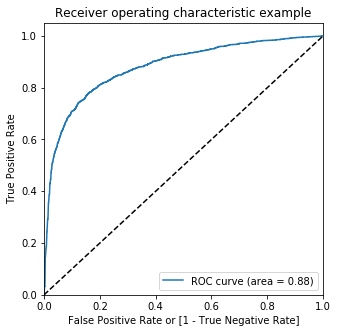

In [76]:
# Call the ROC function

draw_roc(y_train_pred_final.churn, y_train_pred_final.Conversion_Prob)

The area under the curve of the ROC is 0.88 which is quite good. So we seem to have a good model. Let's also check the sensitivity and specificity tradeoff to find the optimal cutoff point.

In [77]:
# Let's create columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,churn,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0.0,0.046874,0,1,0,0,0,0,0,0,0,0,0
1,0.0,0.004508,0,1,0,0,0,0,0,0,0,0,0
2,0.0,0.058925,0,1,0,0,0,0,0,0,0,0,0
3,0.0,0.000335,0,1,0,0,0,0,0,0,0,0,0
4,0.0,0.014428,0,1,0,0,0,0,0,0,0,0,0


In [78]:
# Let's create a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci','preci','recal'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = confusion_matrix(y_train_pred_final.churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    preci = cm1[1,1]/(cm1[1,1]+cm1[0,1])
    recal = cm1[1,1]/(cm1[1,1]+cm1[1,0])
    cutoff_df.loc[i] =[ i , accuracy, sensi, speci, preci, recal]
print(cutoff_df)

     prob  accuracy     sensi     speci     preci     recal
0.0   0.0  0.080524  1.000000  0.000000  0.080524  1.000000
0.1   0.1  0.817571  0.795387  0.819514  0.278468  0.795387
0.2   0.2  0.893857  0.687167  0.911958  0.406010  0.687167
0.3   0.3  0.920524  0.590183  0.949454  0.505572  0.590183
0.4   0.4  0.934000  0.497930  0.972189  0.610587  0.497930
0.5   0.5  0.919714  0.033708  0.997307  0.522936  0.033708
0.6   0.6  0.919476  0.000000  1.000000       NaN  0.000000
0.7   0.7  0.919476  0.000000  1.000000       NaN  0.000000
0.8   0.8  0.919476  0.000000  1.000000       NaN  0.000000
0.9   0.9  0.919476  0.000000  1.000000       NaN  0.000000


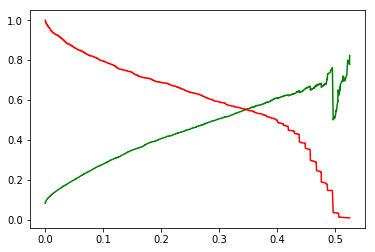

In [79]:
from sklearn.metrics import precision_recall_curve

p, r, thresholds = precision_recall_curve(y_train_pred_final.churn, y_train_pred_final.Conversion_Prob)

plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

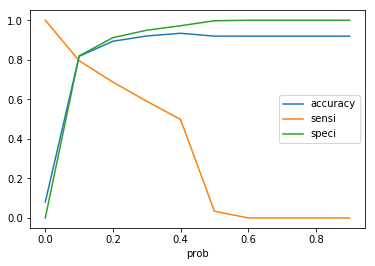

In [80]:
# Let's plot it as well

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [81]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.1 else 0)

y_train_pred_final.head()

,churn,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0.0,0.046874,0,1,0,0,0,0,0,0,0,0,0,0
1,0.0,0.004508,0,1,0,0,0,0,0,0,0,0,0,0
2,0.0,0.058925,0,1,0,0,0,0,0,0,0,0,0,0
3,0.0,0.000335,0,1,0,0,0,0,0,0,0,0,0,0
4,0.0,0.014428,0,1,0,0,0,0,0,0,0,0,0,0


In [82]:
# Let's check the accuracy now


accuracyscore=accuracy_score(y_train_pred_final.churn, y_train_pred_final.final_predicted)
print(accuracyscore)

0.8175714285714286


In [83]:
# Let's create the confusion matrix once again

confusion2 = confusion_matrix(y_train_pred_final.churn, y_train_pred_final.final_predicted )
confusion2

array([[15824,  3485],
       [  346,  1345]], dtype=int64)

In [84]:
# Predicted     not_churn    churn
# Actual
# not_churn        15824     3485
# churn            346       1345  

Here, ratio of predicted customers as churned to actually churned is greater when compared to the predicted customers as not churn to actually churned

In [85]:
# Let's evaluate the other metrics as well

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [86]:
# Calculate the sensitivity, specificity, Precision and recall

sensitivity = round(TP/(TP+FN),2)
specificity = round(TN/(TN+FP),2)
precision = round(TP/(TP+FP),2)
recall = round(TP/(TP+FN),2)

print('sensitivity : {}'.format(sensitivity))
print('specificity : {}'.format(specificity))
print('precision : {}'.format(precision))
print('recall : {}'.format(recall))

sensitivity : 0.8
specificity : 0.82
precision : 0.28
recall : 0.8


In [87]:
import pandas as pd 


results = pd.DataFrame({'Method':['Logistic Regression Train'], 'Accuracyscore': [accuracyscore], 'Sensitivity': [sensitivity], 'Specificity': [specificity],'precision': [precision],'recall': [recall]})


results = results[['Method','Accuracyscore', 'Sensitivity','Specificity','precision', 'recall']]
results

,Method,Accuracyscore,Sensitivity,Specificity,precision,recall
0,Logistic Regression Train,0.817571,0.8,0.82,0.28,0.8


## Prediction on Test dataset

In [88]:
X_test[num_col] = scaler.transform(X_test[num_col])

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train.columns]

In [89]:
# Add a constant to X_test

X_test_sm = sm.add_constant(X_test_new)

In [90]:
# Make predictions on the test set and store it in the variable 'y_test_pred'

y_test_pred = res.predict(X_test_sm)

In [91]:
y_test_pred[:10]

20296    0.173090
8279     0.189415
72269    0.003827
65602    0.028199
42758    0.442672
80210    0.003500
67925    0.067479
25034    0.006267
10422    0.013071
43140    0.041875
dtype: float64

In [92]:
# Converting y_pred_1 to a dataframe

y_pred_1 = pd.DataFrame(y_test_pred)

# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

# Remove index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [93]:
# Append y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

# Rename the column 

y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,churn,Conversion_Prob
0,1.0,0.173090
1,1.0,0.189415
2,0.0,0.003827
3,0.0,0.028199
4,1.0,0.442672


In [94]:
# Make predictions on the test set using 0.45 as the cutoff

y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.1 else 0)
y_pred_final.head()

,churn,Conversion_Prob,final_predicted
0,1.0,0.173090,1
1,1.0,0.189415,1
2,0.0,0.003827,0
3,0.0,0.028199,0
4,1.0,0.442672,1


In [95]:
# Let's check the accuracy now



accuracyscore=accuracy_score(y_pred_final['churn'], y_pred_final.final_predicted)
print(accuracyscore)

0.824908343517387


In [96]:
# Let's create the confusion matrix once again

confusion3 = confusion_matrix(y_pred_final['churn'], y_pred_final.final_predicted)
confusion3

array([[6831, 1420],
       [ 156,  594]], dtype=int64)

Here, ratio of predicted customers as churned to actually churned is greater when compared to the predicted customers as not churn to actually churned

In [97]:
# Let's evaluate the other metrics as well

TP = confusion3[1,1] # true positive 
TN = confusion3[0,0] # true negatives
FP = confusion3[0,1] # false positives
FN = confusion3[1,0] # false negatives

In [98]:
# Calculate the sensitivity, specificity, Precision and recall

sensitivity = round(TP/(TP+FN),2)
specificity = round(TN/(TN+FP),2)
precision = round(TP/(TP+FP),2)
recall = round(TP/(TP+FN),2)

print('sensitivity : {}'.format(sensitivity))
print('specificity : {}'.format(specificity))
print('precision : {}'.format(precision))
print('recall : {}'.format(recall))

sensitivity : 0.79
specificity : 0.83
precision : 0.29
recall : 0.79


In [99]:



tempResults = pd.DataFrame({'Method':['Logistic Regression Test'], 'Accuracyscore': [accuracyscore], 'Sensitivity': [sensitivity], 'Specificity': [specificity],'precision': [precision],'recall': [recall]})

results = pd.concat([results, tempResults])
results = results[['Method','Accuracyscore', 'Sensitivity','Specificity','precision', 'recall']]
results

,Method,Accuracyscore,Sensitivity,Specificity,precision,recall
0,Logistic Regression Train,0.817571,0.80,0.82,0.28,0.80
0,Logistic Regression Test,0.824908,0.79,0.83,0.29,0.79


## 2 ) Data Modelling Technique 

## Decision treee


In [100]:
### splitting  data into 70% train set and  30% test set

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [102]:
X_train.shape, X_test.shape

((21000, 144), (9001, 144))

In [103]:
# Decision tree model is run with class weight as balanced due to heavy (8% -92% ) class imbalance of Output variable called 'churn' 

In [104]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42, max_depth=4, class_weight='balanced')

In [105]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=4, random_state=42)

In [106]:
from sklearn.metrics import classification_report

def evaluate_model(classifier):
    print("Train Accuracy :", accuracy_score(y_train, classifier.predict(X_train)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, classifier.predict(X_train)))
    print("Train Clasiification report:")
    print(classification_report(y_train, classifier.predict(X_train)))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(y_test, classifier.predict(X_test)))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, classifier.predict(X_test)))
    print(classification_report(y_test, classifier.predict(X_test)))

In [107]:
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt



In [108]:
from sklearn import preprocessing, metrics

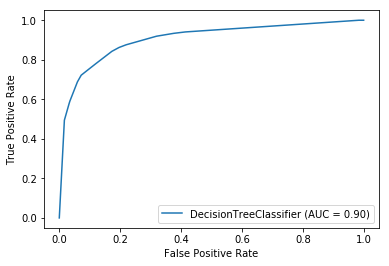

In [109]:
from sklearn.metrics import plot_roc_curve

import sklearn.metrics as metrics


plot_roc_curve(dt, X_train, y_train, drop_intermediate=False)
plt.show()

In [110]:
evaluate_model(dt)

Train Accuracy : 0.8284761904761905
Train Confusion Matrix:
[[15973  3336]
 [  266  1425]]
Train Clasiification report:
              precision    recall  f1-score   support

         0.0       0.98      0.83      0.90     19309
         1.0       0.30      0.84      0.44      1691

    accuracy                           0.83     21000
   macro avg       0.64      0.83      0.67     21000
weighted avg       0.93      0.83      0.86     21000

--------------------------------------------------
Test Accuracy : 0.8299077880235529
Test Confusion Matrix:
[[6856 1395]
 [ 136  614]]
              precision    recall  f1-score   support

         0.0       0.98      0.83      0.90      8251
         1.0       0.31      0.82      0.45       750

    accuracy                           0.83      9001
   macro avg       0.64      0.82      0.67      9001
weighted avg       0.92      0.83      0.86      9001



In [111]:
#Evaluating model performance¶

from sklearn.metrics import confusion_matrix, accuracy_score

y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

In [112]:
accuracyscore=accuracy_score(y_test, y_test_pred)
print(accuracyscore)
confusion_matrixtrain = confusion_matrix(y_train,y_train_pred)
confusion_matrixtrain

0.8299077880235529


array([[15973,  3336],
       [  266,  1425]], dtype=int64)

In [113]:
# Let's evaluate the other metrics as well

TP = confusion_matrixtrain[1,1] # true positive 
TN = confusion_matrixtrain[0,0] # true negatives
FP = confusion_matrixtrain[0,1] # false positives
FN = confusion_matrixtrain[1,0] # false negatives

In [114]:
# Calculate the sensitivity, specificity, Precision and recall

sensitivity = round(TP/(TP+FN),2)
specificity = round(TN/(TN+FP),2)
precision = round(TP/(TP+FP),2)
recall = round(TP/(TP+FN),2)

print('sensitivity : {}'.format(sensitivity))
print('specificity : {}'.format(specificity))
print('precision : {}'.format(precision))
print('recall : {}'.format(recall))

sensitivity : 0.84
specificity : 0.83
precision : 0.3
recall : 0.84


In [115]:
accuracyscore=accuracy_score(y_test, y_test_pred)
print(accuracyscore)
confusion_matrixtest = confusion_matrix(y_test, y_test_pred)
confusion_matrixtest

0.8299077880235529


array([[6856, 1395],
       [ 136,  614]], dtype=int64)

In [116]:
# Let's evaluate the other metrics as well

TP = confusion_matrixtest[1,1] # true positive 
TN = confusion_matrixtest[0,0] # true negatives
FP = confusion_matrixtest[0,1] # false positives
FN = confusion_matrixtest[1,0] # false negatives

In [117]:
# Calculate the sensitivity, specificity, Precision and recall

sensitivity = round(TP/(TP+FN),2)
specificity = round(TN/(TN+FP),2)
precision = round(TP/(TP+FP),2)
recall = round(TP/(TP+FN),2)

print('sensitivity : {}'.format(sensitivity))
print('specificity : {}'.format(specificity))
print('precision : {}'.format(precision))
print('recall : {}'.format(recall))

sensitivity : 0.82
specificity : 0.83
precision : 0.31
recall : 0.82


In [118]:
#tempResults = pd.DataFrame({'Method':['Decision Tree Test'], 'Accuracyscore': [accuracyscore], 'Sensitivity': [sensitivity], 'Specificity': [specificity],'precision': [precision],'recall': [recall]})

#results = pd.concat([results, tempResults])
#results = results[['Method','Accuracyscore', 'Sensitivity','Specificity','precision', 'recall']]
#results

#### Hyper-parameter tuning for the Decision Tree

In [119]:
from sklearn.model_selection import GridSearchCV

dt = DecisionTreeClassifier(random_state=42, class_weight='balanced')

In [120]:
params = {
    "max_depth": [2,3,5,10,15,20,25,50],
    "min_samples_leaf": [20,50,75,100,200,500],
    "criterion": ["gini", "entropy"]
}

In [121]:
grid_search = GridSearchCV(estimator=dt,
                           param_grid=params,
                           cv=4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [122]:
%%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 96 candidates, totalling 384 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   18.1s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 384 out of 384 | elapsed:  4.2min finished


Wall time: 4min 16s


GridSearchCV(cv=4,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 15, 20, 25, 50],
                         'min_samples_leaf': [20, 50, 75, 100, 200, 500]},
             scoring='accuracy', verbose=1)

In [123]:
grid_search.best_score_

0.8608095238095238

In [124]:
dt_best = grid_search.best_estimator_
dt_best

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=10, min_samples_leaf=20, random_state=42)

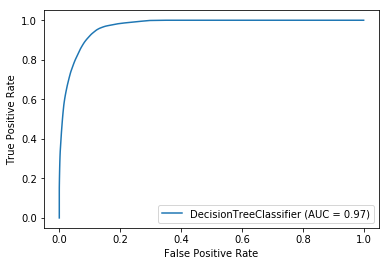

In [125]:
plot_roc_curve(dt_best, X_train, y_train)

plt.show()

In [126]:
evaluate_model(dt_best)

Train Accuracy : 0.8828095238095238
Train Confusion Matrix:
[[16930  2379]
 [   82  1609]]
Train Clasiification report:
              precision    recall  f1-score   support

         0.0       1.00      0.88      0.93     19309
         1.0       0.40      0.95      0.57      1691

    accuracy                           0.88     21000
   macro avg       0.70      0.91      0.75     21000
weighted avg       0.95      0.88      0.90     21000

--------------------------------------------------
Test Accuracy : 0.8656815909343406
Test Confusion Matrix:
[[7192 1059]
 [ 150  600]]
              precision    recall  f1-score   support

         0.0       0.98      0.87      0.92      8251
         1.0       0.36      0.80      0.50       750

    accuracy                           0.87      9001
   macro avg       0.67      0.84      0.71      9001
weighted avg       0.93      0.87      0.89      9001



In [127]:
#Evaluating model performance¶

from sklearn.metrics import confusion_matrix, accuracy_score

y_train_pred = dt_best.predict(X_train)
y_test_pred = dt_best.predict(X_test)

In [128]:
accuracyscore=accuracy_score(y_test, y_test_pred)
print(accuracyscore)
confusion_matrixtrain = confusion_matrix(y_train,y_train_pred)
confusion_matrixtrain

0.8656815909343406


array([[16930,  2379],
       [   82,  1609]], dtype=int64)

In [129]:
# Let's evaluate the other metrics as well

TP = confusion_matrixtrain[1,1] # true positive 
TN = confusion_matrixtrain[0,0] # true negatives
FP = confusion_matrixtrain[0,1] # false positives
FN = confusion_matrixtrain[1,0] # false negatives

In [130]:
# Calculate the sensitivity, specificity, Precision and recall

sensitivity = round(TP/(TP+FN),2)
specificity = round(TN/(TN+FP),2)
precision = round(TP/(TP+FP),2)
recall = round(TP/(TP+FN),2)

print('sensitivity : {}'.format(sensitivity))
print('specificity : {}'.format(specificity))
print('precision : {}'.format(precision))
print('recall : {}'.format(recall))

sensitivity : 0.95
specificity : 0.88
precision : 0.4
recall : 0.95


In [131]:
tempResults = pd.DataFrame({'Method':['Decision Tree Hyperparameter tuning Train'],'Accuracyscore': [accuracyscore], 'Sensitivity': [sensitivity], 'Specificity': [specificity],'precision': [precision],'recall': [recall]})

results = pd.concat([results, tempResults])
results = results[['Method','Accuracyscore', 'Sensitivity','Specificity','precision', 'recall']]
results

,Method,Accuracyscore,Sensitivity,Specificity,precision,recall
0,Logistic Regression Train,0.817571,0.80,0.82,0.28,0.80
0,Logistic Regression Test,0.824908,0.79,0.83,0.29,0.79
0,Decision Tree Hyperparameter tuning Train,0.865682,0.95,0.88,0.40,0.95


In [132]:
accuracyscore=accuracy_score(y_test, y_test_pred)
print(accuracyscore)
confusion_matrixtest = confusion_matrix(y_test, y_test_pred)
confusion_matrixtest

0.8656815909343406


array([[7192, 1059],
       [ 150,  600]], dtype=int64)

In [133]:
# Let's evaluate the other metrics as well

TP = confusion_matrixtest[1,1] # true positive 
TN = confusion_matrixtest[0,0] # true negatives
FP = confusion_matrixtest[0,1] # false positives
FN = confusion_matrixtest[1,0] # false negatives

In [134]:
# Calculate the sensitivity, specificity, Precision and recall

sensitivity = round(TP/(TP+FN),2)
specificity = round(TN/(TN+FP),2)
precision = round(TP/(TP+FP),2)
recall = round(TP/(TP+FN),2)

print('sensitivity : {}'.format(sensitivity))
print('specificity : {}'.format(specificity))
print('precision : {}'.format(precision))
print('recall : {}'.format(recall))

sensitivity : 0.8
specificity : 0.87
precision : 0.36
recall : 0.8


In [135]:
tempResults = pd.DataFrame({'Method':['Decision Tree Hyperparameter tuning Test'],'Accuracyscore': [accuracyscore], 'Sensitivity': [sensitivity], 'Specificity': [specificity],'precision': [precision],'recall': [recall]})

results = pd.concat([results, tempResults])
results = results[['Method','Accuracyscore', 'Sensitivity','Specificity','precision', 'recall']]
results

,Method,Accuracyscore,Sensitivity,Specificity,precision,recall
0,Logistic Regression Train,0.817571,0.80,0.82,0.28,0.80
0,Logistic Regression Test,0.824908,0.79,0.83,0.29,0.79
0,Decision Tree Hyperparameter tuning Train,0.865682,0.95,0.88,0.40,0.95
0,Decision Tree Hyperparameter tuning Test,0.865682,0.80,0.87,0.36,0.80


### Random Forest

In [136]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=10, max_depth=4, max_features=5, random_state=100, 
                            oob_score=True, class_weight='balanced')

In [137]:
%%time
rf.fit(X_train, y_train)

Wall time: 639 ms


RandomForestClassifier(class_weight='balanced', max_depth=4, max_features=5,
                       n_estimators=10, oob_score=True, random_state=100)

In [138]:
rf.oob_score_

0.8547142857142858

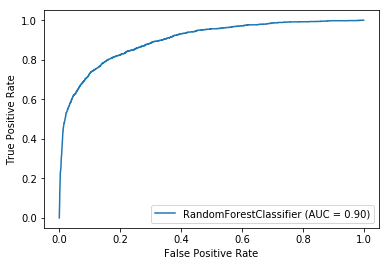

In [139]:
plot_roc_curve(rf, X_train, y_train)
plt.show()

In [140]:
evaluate_model(rf)

Train Accuracy : 0.8767619047619047
Train Confusion Matrix:
[[17152  2157]
 [  431  1260]]
Train Clasiification report:
              precision    recall  f1-score   support

         0.0       0.98      0.89      0.93     19309
         1.0       0.37      0.75      0.49      1691

    accuracy                           0.88     21000
   macro avg       0.67      0.82      0.71     21000
weighted avg       0.93      0.88      0.89     21000

--------------------------------------------------
Test Accuracy : 0.8809021219864459
Test Confusion Matrix:
[[7365  886]
 [ 186  564]]
              precision    recall  f1-score   support

         0.0       0.98      0.89      0.93      8251
         1.0       0.39      0.75      0.51       750

    accuracy                           0.88      9001
   macro avg       0.68      0.82      0.72      9001
weighted avg       0.93      0.88      0.90      9001



#### Hyper-parameter tuning for the Random Forest

In [141]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1, class_weight='balanced')

In [142]:
params = {
    'max_depth': [2,3,5,10],
    'min_samples_leaf': [10,20,50,75,100,200],
    'n_estimators': [10, 25, 50, 100],
    'criterion': ['gini','entropy']
}

In [143]:
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [144]:
%%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 192 candidates, totalling 768 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   22.4s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done 768 out of 768 | elapsed: 13.8min finished


Wall time: 13min 54s


GridSearchCV(cv=4,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10],
                         'min_samples_leaf': [10, 20, 50, 75, 100, 200],
                         'n_estimators': [10, 25, 50, 100]},
             scoring='accuracy', verbose=1)

In [145]:
grid_search.best_score_

0.9289999999999999

In [146]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(class_weight='balanced', max_depth=10,
                       min_samples_leaf=10, n_jobs=-1, random_state=42)

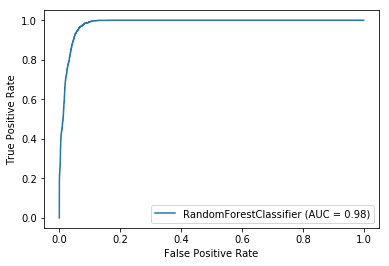

In [147]:
plot_roc_curve(rf_best, X_train, y_train)
plt.show()

In [148]:
evaluate_model(rf_best)

Train Accuracy : 0.9497142857142857
Train Confusion Matrix:
[[18430   879]
 [  177  1514]]
Train Clasiification report:
              precision    recall  f1-score   support

         0.0       0.99      0.95      0.97     19309
         1.0       0.63      0.90      0.74      1691

    accuracy                           0.95     21000
   macro avg       0.81      0.92      0.86     21000
weighted avg       0.96      0.95      0.95     21000

--------------------------------------------------
Test Accuracy : 0.9316742584157316
Test Confusion Matrix:
[[7854  397]
 [ 218  532]]
              precision    recall  f1-score   support

         0.0       0.97      0.95      0.96      8251
         1.0       0.57      0.71      0.63       750

    accuracy                           0.93      9001
   macro avg       0.77      0.83      0.80      9001
weighted avg       0.94      0.93      0.93      9001



In [149]:
#Evaluating model performance¶

from sklearn.metrics import confusion_matrix, accuracy_score

y_train_pred = rf_best.predict(X_train)
y_test_pred = rf_best.predict(X_test)

In [150]:
accuracyscore=accuracy_score(y_test, y_test_pred)
print(accuracyscore)
confusion_matrixtrain = confusion_matrix(y_train,y_train_pred)
confusion_matrixtrain

0.9316742584157316


array([[18430,   879],
       [  177,  1514]], dtype=int64)

In [151]:
# Let's evaluate the other metrics as well

TP = confusion_matrixtrain[1,1] # true positive 
TN = confusion_matrixtrain[0,0] # true negatives
FP = confusion_matrixtrain[0,1] # false positives
FN = confusion_matrixtrain[1,0] # false negatives

In [152]:
# Calculate the sensitivity, specificity, Precision and recall

sensitivity = round(TP/(TP+FN),2)
specificity = round(TN/(TN+FP),2)
precision = round(TP/(TP+FP),2)
recall = round(TP/(TP+FN),2)

print('sensitivity : {}'.format(sensitivity))
print('specificity : {}'.format(specificity))
print('precision : {}'.format(precision))
print('recall : {}'.format(recall))

sensitivity : 0.9
specificity : 0.95
precision : 0.63
recall : 0.9


In [153]:
tempResults = pd.DataFrame({'Method':['Random Forest Hyperparameter tuning Train'],'Accuracyscore': [accuracyscore], 'Sensitivity': [sensitivity], 'Specificity': [specificity],'precision': [precision],'recall': [recall]})

results = pd.concat([results, tempResults])
results = results[['Method','Accuracyscore', 'Sensitivity','Specificity','precision', 'recall']]
results

,Method,Accuracyscore,Sensitivity,Specificity,precision,recall
0,Logistic Regression Train,0.817571,0.80,0.82,0.28,0.80
0,Logistic Regression Test,0.824908,0.79,0.83,0.29,0.79
0,Decision Tree Hyperparameter tuning Train,0.865682,0.95,0.88,0.40,0.95
0,Decision Tree Hyperparameter tuning Test,0.865682,0.80,0.87,0.36,0.80
0,Random Forest Hyperparameter tuning Train,0.931674,0.90,0.95,0.63,0.90


In [154]:
#print(accuracy_score(y_test, y_test_pred))
accuracyscore=accuracy_score(y_test, y_test_pred)
print(accuracyscore)
confusion_matrixtest = confusion_matrix(y_test, y_test_pred)
confusion_matrixtest

0.9316742584157316


array([[7854,  397],
       [ 218,  532]], dtype=int64)

In [155]:
# Let's evaluate the other metrics as well

TP = confusion_matrixtest[1,1] # true positive 
TN = confusion_matrixtest[0,0] # true negatives
FP = confusion_matrixtest[0,1] # false positives
FN = confusion_matrixtest[1,0] # false negatives

In [156]:
# Calculate the sensitivity, specificity, Precision and recall

sensitivity = round(TP/(TP+FN),2)
specificity = round(TN/(TN+FP),2)
precision = round(TP/(TP+FP),2)
recall = round(TP/(TP+FN),2)

print('sensitivity : {}'.format(sensitivity))
print('specificity : {}'.format(specificity))
print('precision : {}'.format(precision))
print('recall : {}'.format(recall))

sensitivity : 0.71
specificity : 0.95
precision : 0.57
recall : 0.71


In [157]:
tempResults = pd.DataFrame({'Method':['Random Forest Hyperparameter tuning Test'], 'Accuracyscore': [accuracyscore],'Sensitivity': [sensitivity], 'Specificity': [specificity],'precision': [precision],'recall': [recall]})

results = pd.concat([results, tempResults])
results = results[['Method', 'Accuracyscore','Sensitivity','Specificity','precision', 'recall']]
results

,Method,Accuracyscore,Sensitivity,Specificity,precision,recall
0,Logistic Regression Train,0.817571,0.80,0.82,0.28,0.80
0,Logistic Regression Test,0.824908,0.79,0.83,0.29,0.79
0,Decision Tree Hyperparameter tuning Train,0.865682,0.95,0.88,0.40,0.95
0,Decision Tree Hyperparameter tuning Test,0.865682,0.80,0.87,0.36,0.80
0,Random Forest Hyperparameter tuning Train,0.931674,0.90,0.95,0.63,0.90
0,Random Forest Hyperparameter tuning Test,0.931674,0.71,0.95,0.57,0.71


### Importance features using random forest

In [158]:
rf_best.feature_importances_

array([0.        , 0.        , 0.        , 0.00456417, 0.00760335,
       0.04986974, 0.00460847, 0.00430599, 0.00696597, 0.00371688,
       0.00502792, 0.01124167, 0.00096277, 0.0026318 , 0.03420664,
       0.00136939, 0.00289136, 0.03136777, 0.00306884, 0.00319144,
       0.01492086, 0.00340013, 0.0041816 , 0.03995183, 0.00139695,
       0.00149191, 0.01003738, 0.00094228, 0.00101164, 0.00093887,
       0.0042026 , 0.00504453, 0.03088682, 0.00283165, 0.00238734,
       0.00429545, 0.00303748, 0.00483779, 0.00584857, 0.00045748,
       0.00060775, 0.00030727, 0.        , 0.        , 0.        ,
       0.00435507, 0.00610935, 0.00825222, 0.00029138, 0.00048829,
       0.00054613, 0.00206469, 0.00285724, 0.00821452, 0.00074761,
       0.        , 0.        , 0.00464464, 0.00620688, 0.04678941,
       0.0034509 , 0.00365929, 0.01389208, 0.0044713 , 0.00438368,
       0.04182033, 0.00358918, 0.00461447, 0.01686631, 0.00438832,
       0.00533782, 0.03324587, 0.00184884, 0.00169898, 0.00442

In [159]:
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": rf_best.feature_importances_
})

In [160]:
### The top important columns affecting the churn are listed below as per Random forest hyper tuned model

In [161]:
imp_df.sort_values(by="Imp", ascending=False).head(10)

,Varname,Imp
89,total_ic_mou_8,0.082414
110,last_day_rch_amt_8,0.054492
5,arpu_8,0.049870
59,total_og_mou_8,0.046789
65,loc_ic_t2m_mou_8,0.041820
23,loc_og_t2m_mou_8,0.039952
104,total_rech_amt_8,0.039943
14,roam_ic_mou_8,0.034207
71,loc_ic_mou_8,0.033246
107,max_rech_amt_8,0.032666


In [162]:
### The top important columns affecting the churn are listed below as per Logistic regression

In [163]:
vif

,Features,VIF
3,total_ic_mou_8,3.17
1,loc_og_t2m_mou_8,3.02
5,total_rech_num_8,2.91
0,loc_og_t2t_mou_8,2.20
6,last_day_rch_amt_8,2.09
2,std_og_mou_8,1.85
8,vol_3g_mb_8,1.39
7,vol_2g_mb_8,1.26
4,spl_ic_mou_8,1.10


# Model Evaluation




In [164]:
# The performance metrics are of all the 3 models are as shown below " 


In [165]:
results

,Method,Accuracyscore,Sensitivity,Specificity,precision,recall
0,Logistic Regression Train,0.817571,0.80,0.82,0.28,0.80
0,Logistic Regression Test,0.824908,0.79,0.83,0.29,0.79
0,Decision Tree Hyperparameter tuning Train,0.865682,0.95,0.88,0.40,0.95
0,Decision Tree Hyperparameter tuning Test,0.865682,0.80,0.87,0.36,0.80
0,Random Forest Hyperparameter tuning Train,0.931674,0.90,0.95,0.63,0.90
0,Random Forest Hyperparameter tuning Test,0.931674,0.71,0.95,0.57,0.71


# Best Model

 The objective of the problem is to identify the features which can help the Telecom  operator to identify the Customers who are planning to churn to other Operater provider. In this category model accuracy is important.
 
 At the same time,True churn candidate need to be predicted as Actual churn candidate so that Telecom company can take proactive steps to retain the customer.Hence Sensitivity of the model should be high.
 
 We can compromise in case a Negative churn candidate has been falsely predicted as Churn candidate. In that scenario also still company will contact this customer to retain in their network. But this should not be very high otherwise company will incur additional cost. Hence Specificity can be moderate. 
 
 Model stability is also important, model should provide similar result in Test and Train.
 
 Considering these  parameters, Logistic regression is providing the best result among 3 models with .79 Sensitivity/Recall.
 
 Logistic regression is providing consisting Train and Test performance metrics showing model stability.

# Recommendation

The top Features for causing Churn from Random forest and Logistic regression are :

1. total_ic_mou_8	0.065629
2. total_rech_amt_8	0.0556263) 
3. arpu_8	0.046496
4. total_og_mou_8	0.036674
5. max_rech_amt_8	0.028110
6. last_day_rch_amt_8	0.023083
7. ic_t2m_mou_8	0.021979
8. loc_ic_mou_8	0.020844
9. loc_og_t2m_mou_8	0.020387
10. loc_og_mou_8	0.019819
11. last_day_rch_amt_8
12. total_rech_num_8
13. std_og_mou_8
14. vol_2g_mb_8
15. spl_ic_mou_8

In [166]:
# selecting top important features
importantfeatures=['mobile_number','spl_ic_mou_8','vol_2g_mb_8','std_og_mou_8','last_day_rch_amt_8','av_rech_amt_data_8','total_ic_mou_8','total_rech_amt_8','arpu_8','total_og_mou_8','max_rech_amt_8','last_day_rch_amt_8','loc_ic_mou_8','loc_og_t2m_mou_8','loc_og_mou_8','total_rech_num_8','churn']

In [167]:
high_value_custimportantfeatures=high_value_cust[importantfeatures]

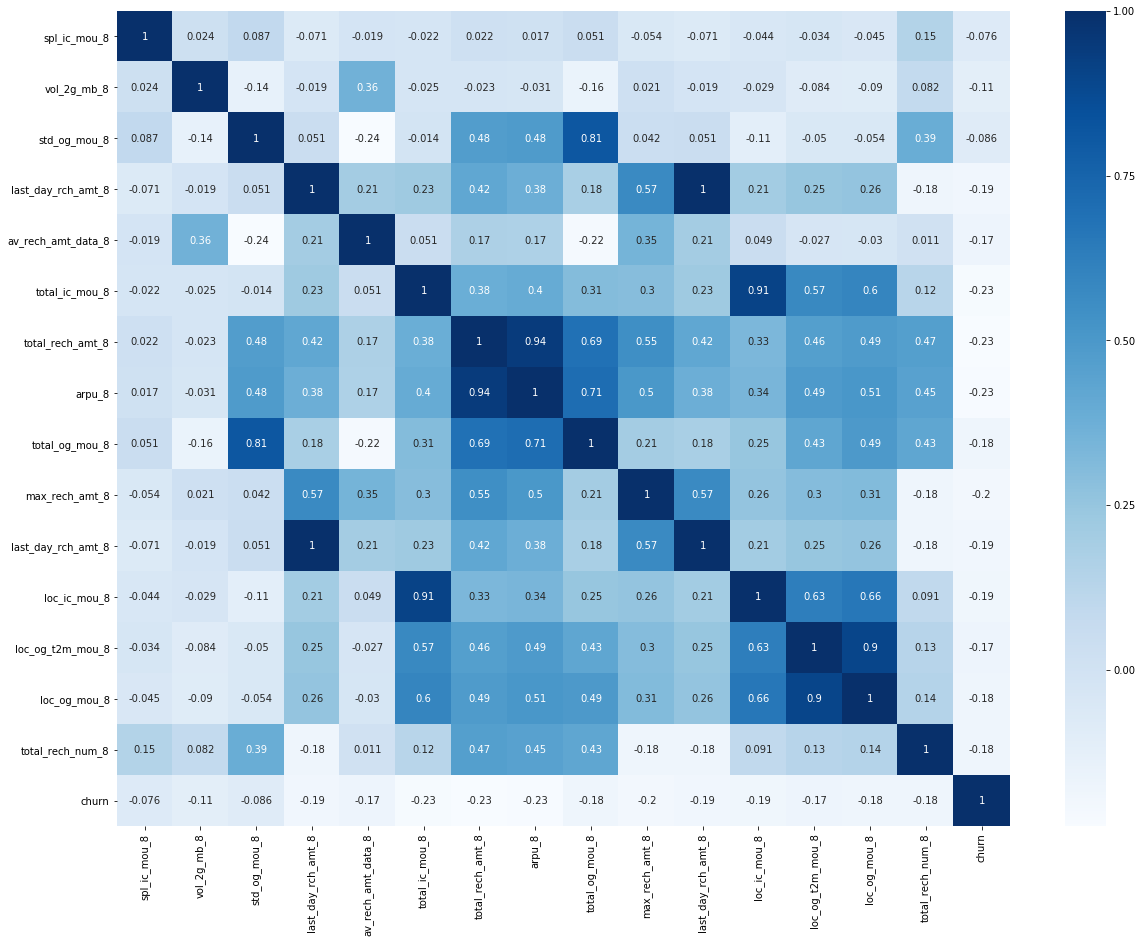

In [168]:
#Let's see the correlation matrix 
plt.figure(figsize = (20,15))        # Size of the figure
sns.heatmap(high_value_custimportantfeatures.corr(),annot = True,cmap="Blues")
plt.show()

# Conclusion

Hence we can see that there is a good amount of positive or negative correlation between the above Features list and output variable Churn

We can suggest the Telecom company the  strategies based on the dependent factors as shown above:

1. total_rech_amnt_8 : Provide Offer on Recharge amount for call to the top customers as this is top factor causing churn
   We can reduce the overall recharge prepaid amount depending on 3 months, 6months plan instead of monthly plan
   This will improve the customer satisfaction as recharge amount is reduced and retention period will increase
   
  
2. total_ic_mou_8 : We can make the incoming call free for these customers 
 

3. average_rech_amt_data_8 : We can provide offer for Data recharge plan in terms of complementary data of 1GB along with Validity for call.

